# Rio Primero Groundwater Model

## First we need all necessary imports

In [1]:
import os
import numpy as np
import flopy.modflow as mf
import shutil

* The modflow-files will be stored in './workspace' 
* Each calculation will delete the files

In [2]:
workspace = os.path.join('workspace')

if os.path.exists(workspace):
    shutil.rmtree(workspace)
    
if not os.path.exists(workspace):
    os.makedirs(workspace)


### Setup Model

In [3]:
model = mf.Modflow(modelname='RP1', exe_name='./modflow/mf2005', model_ws=workspace)

### Setup Discretization

[<Axes: title={'center': ' model_top'}>,
 <Axes: title={'center': 'botm layer 1'}>,
 <Axes: title={'center': 'botm layer 2'}>,
 <Axes: title={'center': 'botm layer 3'}>]

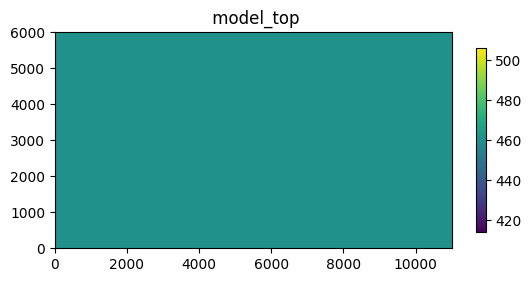

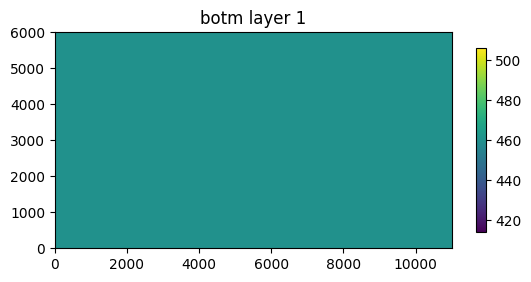

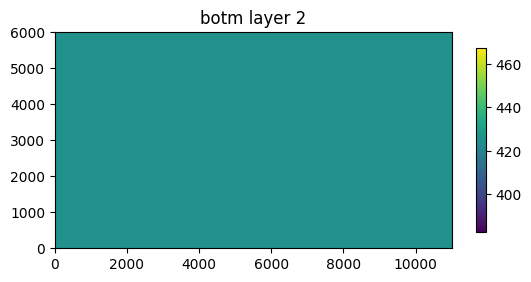

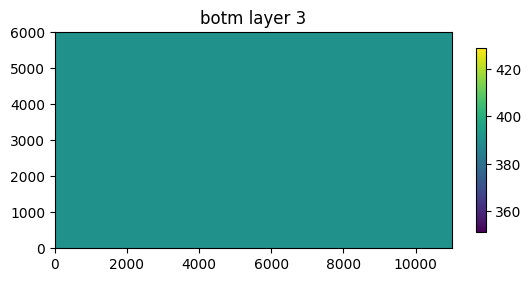

In [4]:
nlay = 3
nrow = 6
ncol = 11

delr = 6000/nrow
delc = 11000/ncol

dis = mf.ModflowDis(model, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc, top=460, botm=390, nper=1, steady=True)
dis.plot()

### Setup Boundary Conditions East/West

[<Axes: title={'center': ' CHD location stress period 1 layer 1'}>,
 <Axes: title={'center': ' CHD location stress period 1 layer 2'}>,
 <Axes: title={'center': ' CHD location stress period 1 layer 3'}>]

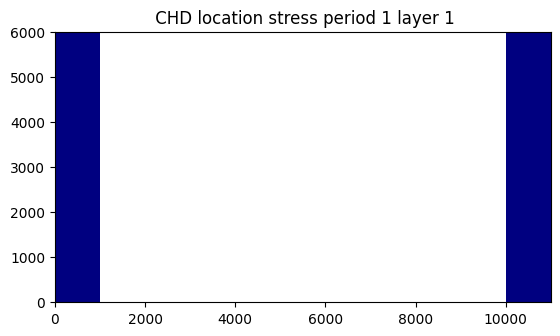

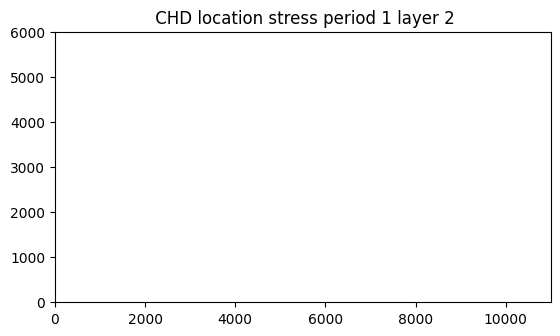

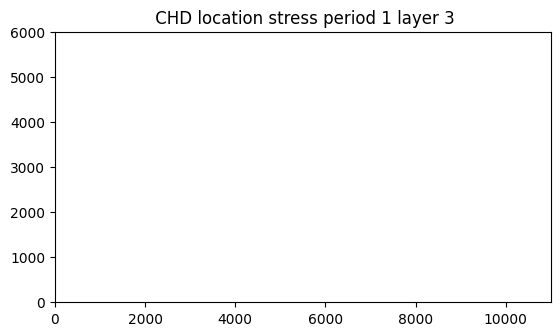

In [5]:
spd = {
    0: [
        [0, 0, 0, 450, 450],
        [0, 1, 0, 450, 450],
        [0, 2, 0, 450, 450],
        [0, 3, 0, 450, 450],
        [0, 4, 0, 450, 450],
        [0, 5, 0, 450, 450],
        [0, 0, 10, 445, 445],
        [0, 1, 10, 445, 445],
        [0, 2, 10, 445, 445],
        [0, 3, 10, 445, 445],
        [0, 4, 10, 445, 445],
        [0, 5, 10, 445, 445],
    ]
}

chd = mf.ModflowChd(model, stress_period_data=spd)
chd.plot()

### Setup Recharge


[<Axes: title={'center': 'RECH stress period 1'}>]

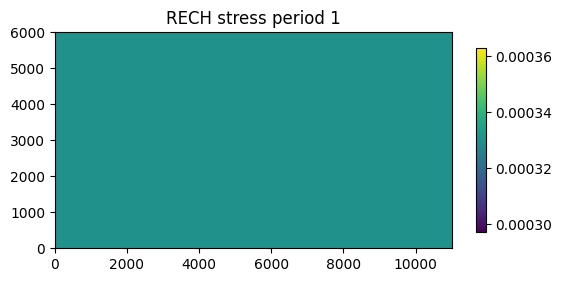

In [6]:
rech = {}
rech[0] = 0.00033
rch = mf.ModflowRch(model, rech=rech)
rch.plot()

### Setup lake

In [7]:
# nlakes : int
#     NLAKES Number of separate lakes.
#     Sublakes of multiple-lake systems are considered separate lakes for
#     input purposes. The variable NLAKES is used, with certain internal
#     assumptions and approximations, to dimension arrays for the simulation.
nlakes = 2

# (ILKCB in MODFLOW documentation)
# Whether or not to write cell-by-cell flows (yes if ILKCB> 0, no
# otherwise). If ILKCB< 0 and "Save Budget" is specified in the Output
# Control or ICBCFL is not equal to 0, the cell-by-cell flows will be
# printed in the standard output file. ICBCFL is specified in the input
# to the Output Control Option of MODFLOW.
ipakcb = None

# lwrt : int or list of ints (one per SP)
#     lwrt > 0, suppresses printout from the lake package. Default is 0 (to
#     print budget information)
lwrt = 0  # print budget information

# THETA is a time-weighting factor for the lake package (Merritt and Konikow, 2000, p. 52)
# for transient simulations (for steady-state stress periods, THETA is automatically set to 1.0).
# if 

# if set to -1, then the lake bed is horizontal and the lake bottom elevation is constant
# can be 1.0, 0.5, 0.0, -0.0(?) -0.5, -1.0
# if positive, NSSITR, SSCNCR und SURFDEP will be ignored
theta = -1

# if theta is negative, NSSITR, SSCNCR und SURFDEP must be specified
# nssitr : int
#     Maximum number of iterations for Newton's method of solution for
#     equilibrium lake stages in each MODFLOW iteration for steady-state
#     aquifer head solution. Only read if ISS (option flag input to DIS
#     Package of MODFLOW indicating steady-state solution) is not zero or
#     if THETA is specified as a negative value.
#     *   NSSITR and SSCNCR may be omitted for transient solutions (ISS = 0).
#     *   In MODFLOW-2000 and later, ISS is not part of the input.
#         Instead NSSITR or SSCNCR should be included if one or more stress
#         periods is a steady state stress period as defined in Ss/tr in the
#         Discretization file.
#     *   SSCNCR and NSSITR can be read for a transient only simulation by
#         placing a negative sign immediately in front of THETA. A negative
#         THETA sets a flag which assumes input values for NSSITR and SSCNCR
#         will follow THETA in the format as described by Merritt and Konikow
#         (p. 52). A negative THETA is automatically reset to a positive
#         value after values of NSSITR and SSCNCR are read.
#     *   If NSSITR = 0, a value of 100 will be used instead.
nssitr = 0 # maximum number of iterations for Newton's method of solution for equilibrium lake stages in each MODFLOW iteration for steady-state aquifer head solution

# sscncr : float
#     Convergence criterion for equilibrium lake stage solution by Newton's
#     method. Only read if ISS is not zero or if THETA is specified as a
#     negative value. See notes above for nssitr.
sscncr = 0.001 # convergence criterion for equilibrium lake stage solution by Newton's method

# surfdep : float
#     The height of small topological variations (undulations) in lake-bottom
#     elevation. Only read if ISS is not zero or if THETA is specified as a
#     negative value. See notes above for nssitr.
#     Values of SURFDEPTH ranging
#     from 0.01 to 0.5 have been used successfully in test simulations.
surfdep = 0.01 # height of small topological variations (undulations) in lake-bottom elevation

# stages : float or list of floats
#     The initial stage of each lake at the beginning of the run.
stages = [452, 450] # initial stage of each lake at the beginning of the run

# stage_range : list of tuples (ssmn, ssmx) of length nlakes
#     Where ssmn and ssmx are the minimum and maximum stages allowed for each
#     lake in steady-state solution.
#     *   SSMN and SSMX are not needed for a transient run and must be
#         omitted when the solution is transient.
#     *   When the first stress period is a steady-state stress period,
#         SSMN is defined in record 3.
# 
#     For subsequent steady-state stress periods, SSMN is defined in
#     record 9a.
stage_range = [(450, 455), (448, 452)] # minimum and maximum stages allowed for each lake in steady-state solution

# sscncr is the concentration of solutes in the lake water


In [8]:
#LAKARR is a three-dimensional integer array that defines the lake number for each cell.
#LAKARR must be specified for every active model cell. If a cell is not a lake, then LAKARR should be set to zero.

lakArr = np.zeros((nlay,nrow,ncol))
lakArr[0, 4, 9] = 1
lakArr[0, 2, 4] = 2

In [9]:
ibound = np.ones((nlay,nrow,ncol))
wetdry = -0.01 * np.ones((nlay,nrow,ncol))

ibound = np.where(lakArr > 0, 0, ibound) #IBOUND should be set to zero for every lake cell (LKARR >0)
wetdry = np.where(lakArr > 0, 0, wetdry) #WETDRY should be set to zero for every lake cell (LKARR >0)

In [10]:
bdlknc=np.zeros((nlay,nrow,ncol))
bdlknc = np.where(lakArr ==1, 10.0, bdlknc) #setting bed leakance value for lake 1
bdlknc = np.where(lakArr ==2, 20.0, bdlknc) #setting bed leakance value for lake 2

In [11]:
flux_data={0:[[0.003, 0.0073, 0.0, 0.0],
              [0.005, 0.0073, 0.0, 0.0]]}

In [12]:
lak = mf.ModflowLak(
    model,
    nlakes=nlakes,
    theta=theta,
    nssitr=nssitr,
    sscncr=sscncr,
    surfdep=surfdep,
    stages=[452.0,450],
    stage_range=stage_range,
    lakarr=lakArr,
    bdlknc=bdlknc,
    flux_data=flux_data,
    unit_number=16,
    lwrt=lwrt
)

### Setup Basic Package

[<Axes: title={'center': 'ibound layer 1'}>,
 <Axes: title={'center': 'ibound layer 2'}>,
 <Axes: title={'center': 'ibound layer 3'}>,
 <Axes: title={'center': 'strt layer 1'}>,
 <Axes: title={'center': 'strt layer 2'}>,
 <Axes: title={'center': 'strt layer 3'}>]

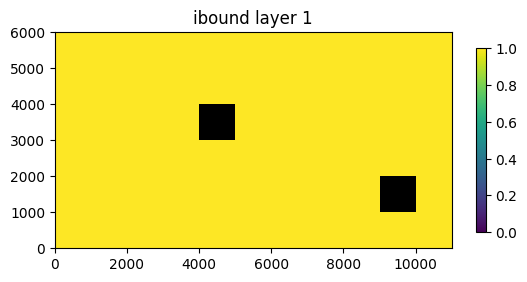

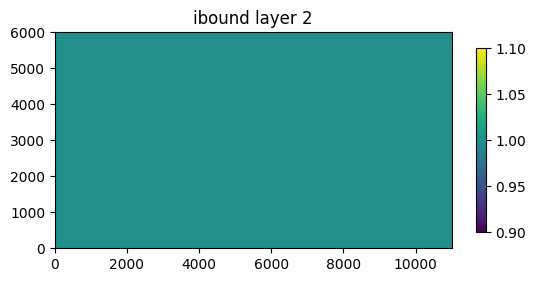

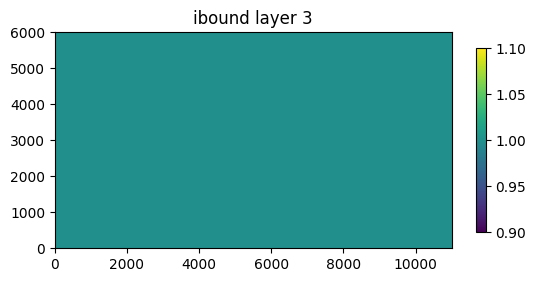

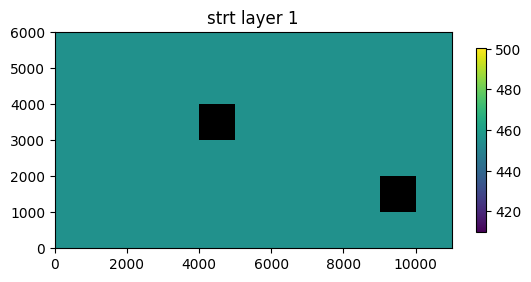

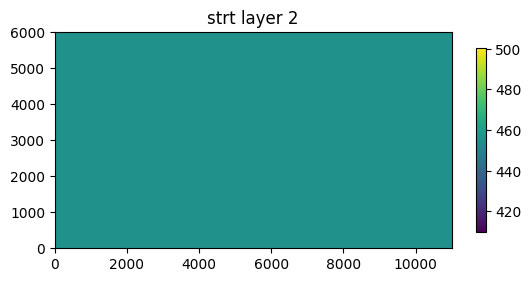

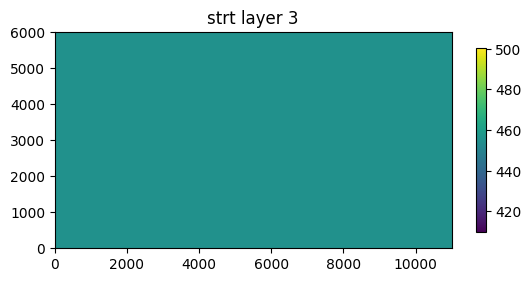

In [13]:
bas = mf.ModflowBas(model, ibound=ibound, strt=455.0)
bas.plot()

### Setup Flow-Package (incl. soil parameters)

In [14]:
lpf = mf.ModflowLpf(model, hk=8.64, vka=0.864, ss=1e-5, sy=0.2, wetdry=wetdry)
#lpf.plot()

### The Solver and Output Control

In [15]:
pcg = mf.ModflowPcg(model, rclose=1e-2, hclose=1e-2)
oc = mf.ModflowOc(model)

### Calculate the model

In [16]:
model.write_input()
model.run_model()

FloPy is using the following executable to run the model: ../modflow/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: RP1.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2023/08/16 15:08:23


(False, [])

### Read calculated data

In [17]:
import flopy.utils as fu

hds = fu.HeadFile(os.path.join(workspace, 'RP1.hds'))
h = hds.get_data(kstpkper=(0,0))

ValueError: datafile error: file is empty: workspace/RP1.hds

### Plot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, delr * ncol, ncol)
y = np.linspace(delc* nrow, 0, nrow)

c = plt.contour(x, y, h[0], np.arange(435.0, 460.0, 1))
plt.clabel(c, fmt='%2.1f')
plt.axis('scaled')
plt.plot()

In [19]:
import json
 
# Opening JSON file
f = open('./lak.json')

lakObj = json.load(f)
f.close()
from adapters.lakAdapter import LakAdapter


lak = LakAdapter(lakObj)
lak.merge()

lakPkg = lak.get_package(model)

Exception: Transient3d error: value cannot be a list anymore.  try a dict{kper,value}

In [ ]:
for key in lakObj:
    if key == 'flux_data':
        print(key)

In [21]:
arr = np.array([[1,2,3],[4,5,6]])
arr


array([[1, 2, 3],
       [4, 5, 6]])

In [22]:
(arr.__name__)

AttributeError: 'numpy.ndarray' object has no attribute '__name__'